 # Running tensors and pytorch on GPU

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## Easy way

In [2]:
!nvidia-smi

Fri Oct  3 19:50:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.08                 Driver Version: 581.08         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   41C    P8              4W /   35W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
torch.cuda.is_available()

True

In [4]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
 torch.cuda.device_count()

1

### putting tensors on GPU

In [6]:
# create tensors(default on the cpu)
tensor=torch.tensor([1,2,3])

#tensor not on gpu
print(tensor,tensor.device)

tensor([1, 2, 3]) cpu


In [7]:
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

In [8]:
# if tensor is on GPU, then tensor can't transform in numpy
# tensor_on_gpu.numpy()

In [9]:
tensor_on_cpu=tensor_on_gpu.cpu().numpy()
tensor_on_cpu

array([1, 2, 3])

In [10]:
torch.__version__

'2.8.0+cu129'

# Machinee learning Started

In [11]:
weight=0.7
bais=0.3

In [12]:
start =1
end =2
step =0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * x +bais

x,y

(tensor([[1.0000],
         [1.0200],
         [1.0400],
         [1.0600],
         [1.0800],
         [1.1000],
         [1.1200],
         [1.1400],
         [1.1600],
         [1.1800],
         [1.2000],
         [1.2200],
         [1.2400],
         [1.2600],
         [1.2800],
         [1.3000],
         [1.3200],
         [1.3400],
         [1.3600],
         [1.3800],
         [1.4000],
         [1.4200],
         [1.4400],
         [1.4600],
         [1.4800],
         [1.5000],
         [1.5200],
         [1.5400],
         [1.5600],
         [1.5800],
         [1.6000],
         [1.6200],
         [1.6400],
         [1.6600],
         [1.6800],
         [1.7000],
         [1.7200],
         [1.7400],
         [1.7600],
         [1.7800],
         [1.8000],
         [1.8200],
         [1.8400],
         [1.8600],
         [1.8800],
         [1.9000],
         [1.9200],
         [1.9400],
         [1.9600],
         [1.9800]]),
 tensor([[1.0000],
         [1.0140],
         [

In [13]:
x[:20],y[:20]

(tensor([[1.0000],
         [1.0200],
         [1.0400],
         [1.0600],
         [1.0800],
         [1.1000],
         [1.1200],
         [1.1400],
         [1.1600],
         [1.1800],
         [1.2000],
         [1.2200],
         [1.2400],
         [1.2600],
         [1.2800],
         [1.3000],
         [1.3200],
         [1.3400],
         [1.3600],
         [1.3800]]),
 tensor([[1.0000],
         [1.0140],
         [1.0280],
         [1.0420],
         [1.0560],
         [1.0700],
         [1.0840],
         [1.0980],
         [1.1120],
         [1.1260],
         [1.1400],
         [1.1540],
         [1.1680],
         [1.1820],
         [1.1960],
         [1.2100],
         [1.2240],
         [1.2380],
         [1.2520],
         [1.2660]]))

In [14]:
len(x),len(y)

(50, 50)

### Testing and Traning data

In [15]:
#creat test and train data set
train_split = int(0.8* len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [16]:
def plot_predictions (train_data=x_train,
                      train_labels=y_train,
                      test_data=x_test,
                      test_labels=y_test,
                      predictions=None): 
    
    """
    Plots training data, test data and compares predictions.
    """

    plt.figure(figsize=(10,7))
    #Plot training data in blue
    plt.scatter(x_train,y_train,c='b',label="traning data",s=6)
    #plot test data in green
    plt.scatter(x_test,y_test,c='g',label='testing data',s=6)

    if predictions is not None:
        plt.scatter(x_test,predictions,c='r',label='pridected data',s=6)
    plt.legend()    


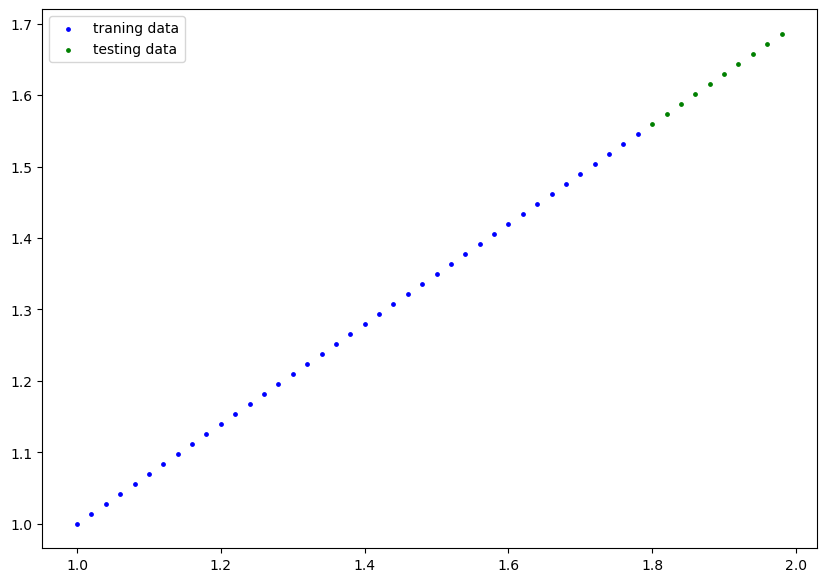

In [17]:
plot_predictions()

### building model
first Pytorch model

## PyTorch module                What does it do?

**torch.nn**                      Contains all of the building blocks for computational graphs                                          (essentially a series of computations executed in a particular way).

**torch.nn.Module**                The base class for all neural network modules, all the building blocks                                for neural networks are subclasses. If you're building a neural                                       network in PyTorch, your models should subclass nn. Module. Requires                                 forward () method be implemented.

**torch.optim**                    Contains various optimization algorithms (these tell the model                                        parameters stored in nn. Parameter how to best change to improve                                      gradient descent and in turn reduce the loss).

**torch.utils.data.Dataset**       Represents a map between key (label) and sample (features) pairs of                                   your data. Such as images and their associated labels.

**torch.utils.data.DataLoader**    Creates a Python iterable over a torch Dataset (allows you to iterate                                 over your data).

In [18]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits
    def __init__(self):
        super().__init__()
        self.weights= nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        
        self.bias= nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
            
        #Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights*x + self.bias # this is the linear regression formula

In [19]:
#Create a random seed
torch.manual_seed(42)
# Create an instance of the model (this is a subclass of nn. Module)
model_0= LinearRegressionModel()
#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using torch.inference_mode()
To check our model's predictive power, let's see how well it predicts y_test based on x_test.

When we pass data through our model, it's going to run it through the forward() method.

In [21]:
x_test

tensor([[1.8000],
        [1.8200],
        [1.8400],
        [1.8600],
        [1.8800],
        [1.9000],
        [1.9200],
        [1.9400],
        [1.9600],
        [1.9800]])

In [22]:
y_test

tensor([[1.5600],
        [1.5740],
        [1.5880],
        [1.6020],
        [1.6160],
        [1.6300],
        [1.6440],
        [1.6580],
        [1.6720],
        [1.6860]])

In [23]:
ypred=model_0(x_test)
ypred

tensor([[0.7349],
        [0.7416],
        [0.7483],
        [0.7551],
        [0.7618],
        [0.7685],
        [0.7753],
        [0.7820],
        [0.7887],
        [0.7955]], grad_fn=<AddBackward0>)

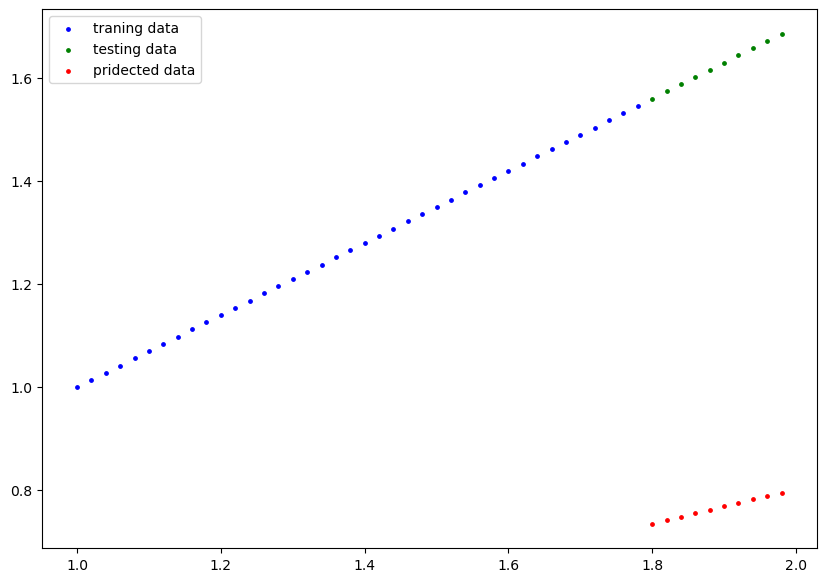

In [24]:
plot_predictions(predictions=ypred.detach())

to avoid using detach() for **(grad_fn=<AddBackward0)**

In [25]:
# make predictions with inference mode
with torch.inference_mode():
    y_preds=model_0(x_test)

y_preds    

tensor([[0.7349],
        [0.7416],
        [0.7483],
        [0.7551],
        [0.7618],
        [0.7685],
        [0.7753],
        [0.7820],
        [0.7887],
        [0.7955]])

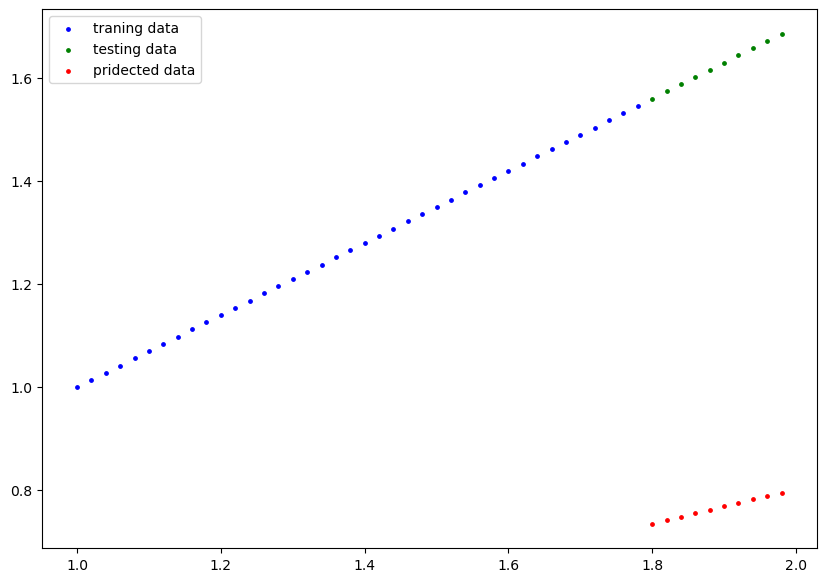

In [26]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
  
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function

 Inside the optimizer you'll often have to set two parameters:

- params the model parameters you'd like to optimize, for example param=model_0.parameters()

- lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes)

And specifically for pytorch, we need:
* A training loop
* A test loop

In [27]:
#Setup a loss function
loss_fn= nn.L1Loss()
#Setup an optimizer (stochastic gradient descent)
optimizer= torch.optim.SGD(params=model_0.parameters(),lr=0.004)
#lr learning rate possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's forward()` functions) to make predictions on data also called forward propagation -
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward -move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**Back propagation** )
5. Optimizer step -use the optimizer to adjust our model's parameters to try and improve the loss (**Gradent Desent**)

In [28]:
epochs=100

In [29]:
###Training

#tracking
epoch_count=[]
loss_values=[]
test_loss_values=[]
    

#0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients 
    
    #1. Forward pass
    y_pred=model_0(x_train)
    
    #2. Calculate the loss
    loss=loss_fn(y_pred, y_train)
    #print("loss:",loss)
    
    #3. Optimizer zero grad 
    optimizer.zero_grad()
    
    #4. Perform backpropagation on the loss with respect to the parameters of the model 
    loss.backward()
    
    #5. Step the optimizer (perform gradient descent)
    optimizer.step()

    ### testing
    model_0.eval() #turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers) 
    with torch.inference_mode(): #turns off gradient tracking & a couple more things behind the scenes
    #you may also see torch.no grad() in older PyTorch code
        
        # 1. Do the forward pass
        test_pred=model_0(x_test)
        # 2. Calculate the losа
        test_loss=loss_fn(test_pred, y_test)
    if epoch% 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | loss: {loss} | test loss: {test_loss}")
        # Print out model state dict()                
        print(model_0.state_dict())

Epoch: 0 | loss: 0.676190972328186 | test loss: 0.84333735704422
OrderedDict({'weights': tensor([0.3423]), 'bias': tensor([0.1328])})
Epoch: 10 | loss: 0.5589069128036499 | test loss: 0.6982532143592834
OrderedDict({'weights': tensor([0.3979]), 'bias': tensor([0.1728])})
Epoch: 20 | loss: 0.4416228234767914 | test loss: 0.5531690716743469
OrderedDict({'weights': tensor([0.4535]), 'bias': tensor([0.2128])})
Epoch: 30 | loss: 0.32433873414993286 | test loss: 0.40808504819869995
OrderedDict({'weights': tensor([0.5091]), 'bias': tensor([0.2528])})
Epoch: 40 | loss: 0.20705492794513702 | test loss: 0.26300135254859924
OrderedDict({'weights': tensor([0.5647]), 'bias': tensor([0.2928])})
Epoch: 50 | loss: 0.08977112174034119 | test loss: 0.11791761964559555
OrderedDict({'weights': tensor([0.6203]), 'bias': tensor([0.3328])})
Epoch: 60 | loss: 0.008317748084664345 | test loss: 0.01920497417449951
OrderedDict({'weights': tensor([0.6589]), 'bias': tensor([0.3584])})
Epoch: 70 | loss: 0.007781779

In [30]:
# epoch_count,loss_values,test_loss_values

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1296\1775091432.py:2: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:836.)
  plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")


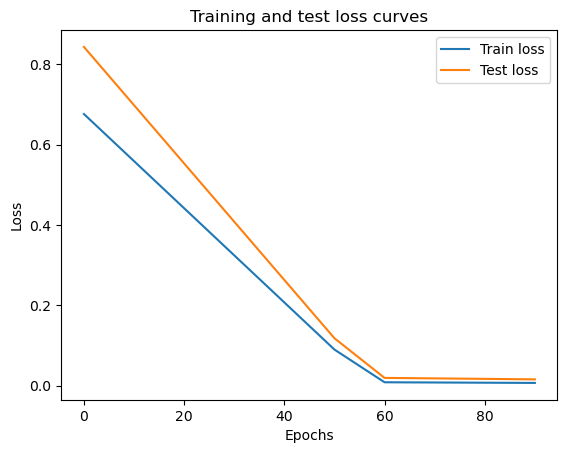

In [31]:
#Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count,  np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [32]:
#optimizer.state_dict()

In [33]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6693])), ('bias', tensor([0.3436]))])

In [34]:
weight,bais

(0.7, 0.3)

In [35]:
with torch.inference_mode():
    y_preds_new=model_0(x_test)
y_preds_new    

tensor([[1.5483],
        [1.5617],
        [1.5751],
        [1.5885],
        [1.6018],
        [1.6152],
        [1.6286],
        [1.6420],
        [1.6554],
        [1.6688]])

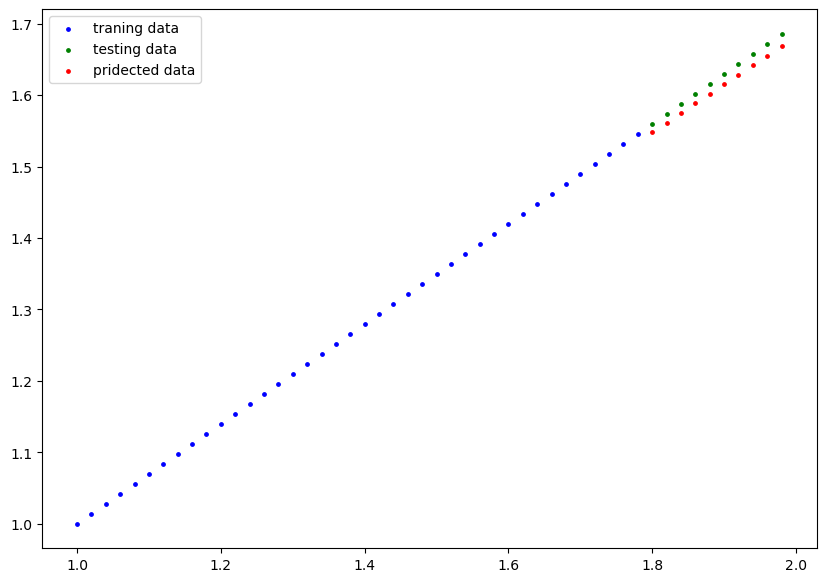

In [36]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch
There are three main methods you should about for saving and loading models in PyTorch.
1. `torch.save()` -allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` this allows to load a model's saved state dictionary

In [37]:
#Saving our PyTorch model
from pathlib import Path
#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
#2. Create model save path
MODEL_NAME = "pytorch_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
            f=MODEL_SAVE_PATH)

Saving model to: models\pytorch_model_1.pth


In [38]:
# torch.save(model_0.state_dict(), "model.pth") is enough.

In [39]:
 torch.save(model_0.state_dict(), "model.pth")

## Loading a PyTorch model
Since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and load the saved
state_dict() into that.

In [40]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6693])), ('bias', tensor([0.3436]))])

In [41]:
1# To load in a saved state dict we have to instantiate a new instance of our model class
loaded_model_0=LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
#loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [42]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6693])), ('bias', tensor([0.3436]))])

In [43]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model_0(x_test)
loaded_model_preds

tensor([[1.5483],
        [1.5617],
        [1.5751],
        [1.5885],
        [1.6018],
        [1.6152],
        [1.6286],
        [1.6420],
        [1.6554],
        [1.6688]])

#### Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).
If no GPU is available, the code will default to using CPU

In [44]:
torch.cuda.is_available()

True

In [45]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## creating pytorch linear model

In [46]:
#Create a linear model by subclassing nn. Module
class LinearRegressionModelV2(nn.Module):
    def __init__ (self):
        super().__init__()
        #Use nn.Linear() for creating the model parameters
        self.linear_layer=nn.Linear(in_features=1,
                                    out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [47]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [48]:
x_train[:5],y_train[:5]

(tensor([[1.0000],
         [1.0200],
         [1.0400],
         [1.0600],
         [1.0800]]),
 tensor([[1.0000],
         [1.0140],
         [1.0280],
         [1.0420],
         [1.0560]]))

In [49]:
#set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training
For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [50]:
#setup loss function
loss_fn=nn.L1Loss() # MAE

#setup optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.001)

In [51]:
#traing loop
torch.manual_seed(42)
epochs=4000

x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
    # Set the model to training mode
    model_1.train()
    
    #1. Forward pass
    y_pred=model_1(x_train)
    
    #2. Calculate the loss
    loss=loss_fn(y_pred, y_train)
    
    #3. Optimizer zero grad 
    optimizer.zero_grad()
    
    #4. backpropagation 
    loss.backward()
    
    #5. Step the optimizer (perform gradient descent)
    optimizer.step()

    ### testing
    model_1.eval() 
    with torch.inference_mode():
        
        # 1. Do the forward pass
        test_pred=model_1(x_test)
        
        # 2. Calculate the losа
        test_loss=loss_fn(test_pred, y_test)
    if epoch% 500 == 0:
        print(f"Epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

Epoch: 0 | loss: 0.6197165250778198 | test loss: 0.6483587026596069
Epoch: 500 | loss: 0.04140276461839676 | test loss: 0.0961308628320694
Epoch: 1000 | loss: 0.034702617675065994 | test loss: 0.08098297566175461
Epoch: 1500 | loss: 0.028004154562950134 | test loss: 0.06546606868505478
Epoch: 2000 | loss: 0.021307775750756264 | test loss: 0.0497523657977581
Epoch: 2500 | loss: 0.014611000195145607 | test loss: 0.034130778163671494
Epoch: 3000 | loss: 0.007914820685982704 | test loss: 0.01832519844174385
Epoch: 3500 | loss: 0.0012178838951513171 | test loss: 0.0027975679840892553


In [52]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6976]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3045], device='cuda:0'))])

In [53]:
model_1.eval()
with torch.inference_mode():
    y_preds=model_1(x_test)
y_preds ,y_test   

(tensor([[1.5601],
         [1.5740],
         [1.5880],
         [1.6019],
         [1.6159],
         [1.6299],
         [1.6438],
         [1.6578],
         [1.6717],
         [1.6857]], device='cuda:0'),
 tensor([[1.5600],
         [1.5740],
         [1.5880],
         [1.6020],
         [1.6160],
         [1.6300],
         [1.6440],
         [1.6580],
         [1.6720],
         [1.6860]], device='cuda:0'))

In [54]:
def plot_predictions(predictions,x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):

    plt.figure(figsize=(10,7))
    plt.scatter(x_train.cpu(), y_train.cpu(), c='b', label="training data", s=6)
    plt.scatter(x_test.cpu(), y_test.cpu(), c='g', label="testing data", s=6)
    if predictions!=None:
        plt.scatter(x_test.cpu(), predictions.cpu(), c='r', label="predictions", s=6)
    plt.legend()
    plt.show()


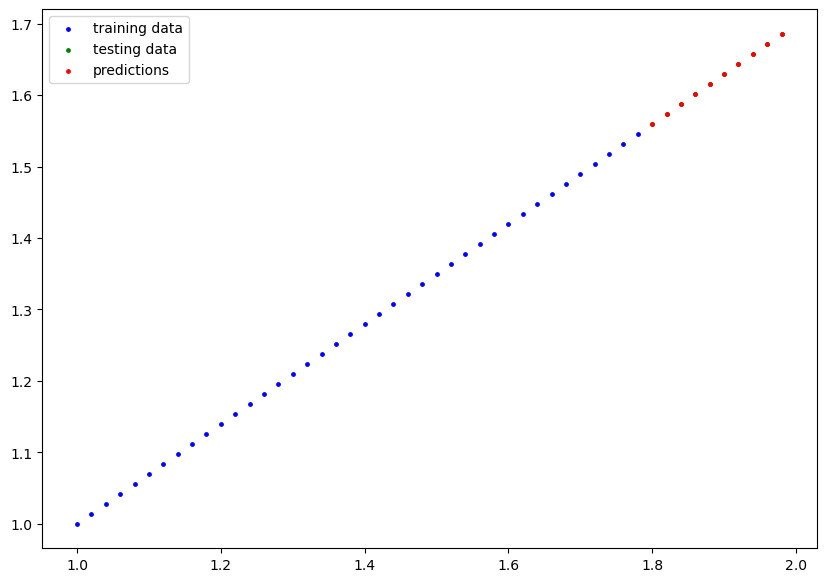

In [55]:
plot_predictions(predictions=y_preds)

In [56]:
torch.save(model_1.state_dict(),'model_1.pth')

In [57]:
loaded_model_1=LinearRegressionModelV2()

In [58]:
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [59]:
loaded_model_1.load_state_dict(torch.load("model_1.pth"))

<All keys matched successfully>

In [60]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)